In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,func, Interval, distinct
from sqlalchemy.sql.expression import text

In [4]:

engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base=automap_base()
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)


In [9]:
inspector=inspect(engine)

# Exploratory Precipitation Analysis

In [10]:
measurement = engine.execute('SELECT * FROM Measurement')

In [11]:
measurement.keys()

RMKeyView(['id', 'station', 'date', 'prcp', 'tobs'])

In [12]:
 measurement.fetchall()


[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0),
 (11, 'USC00519397', '2010-01-12', 0.0, 61.0),
 (12, 'USC00519397', '2010-01-14', 0.0, 66.0),
 (13, 'USC00519397', '2010-01-15', 0.0, 65.0),
 (14, 'USC00519397', '2010-01-16', 0.0, 68.0),
 (15, 'USC00519397', '2010-01-17', 0.0, 64.0),
 (16, 'USC00519397', '2010-01-18', 0.0, 72.0),
 (17, 'USC00519397', '2010-01-19', 0.0, 66.0),
 (18, 'USC00519397', '2010-01-20', 0.0, 66.0),
 (19, 'USC00519397', '2010-01-21', 0.0, 69.0),
 (20, 'USC00519397', '2010-01-22', 0.0, 67.0),
 (21, 'USC00519397', '2010-01-23', 0.0, 67.0),
 (22, 'USC00519397

In [13]:
columns=inspector.get_columns('Measurement')
for column in columns:
    print(column['name'],column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [14]:
# Find the most recent date in the data set.

In [15]:
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [17]:
lastyear_date=dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(lastyear_date)

2016-08-23


In [18]:
twelve_months_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.date <= '2017-08-23').all()

In [19]:
type(twelve_months_data)

list

In [20]:
precipitation_score_df  = pd.DataFrame(twelve_months_data)

In [21]:
precipitation_score_df.head(3)



,0,1
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08


In [22]:
list(precipitation_score_df.columns)


[0, 1]

In [23]:
precipitation_score_df=precipitation_score_df.rename(columns={0:'date', 1:'Precipitation'})

In [24]:
precipitation_score_df.head(3)

,date,Precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08


In [25]:
precipitation_score_df = precipitation_score_df.set_index('date')

In [26]:
precipitation_score_df=precipitation_score_df.sort_values(by='date').dropna()
precipitation_score_df.head(3)

,Precipitation
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05


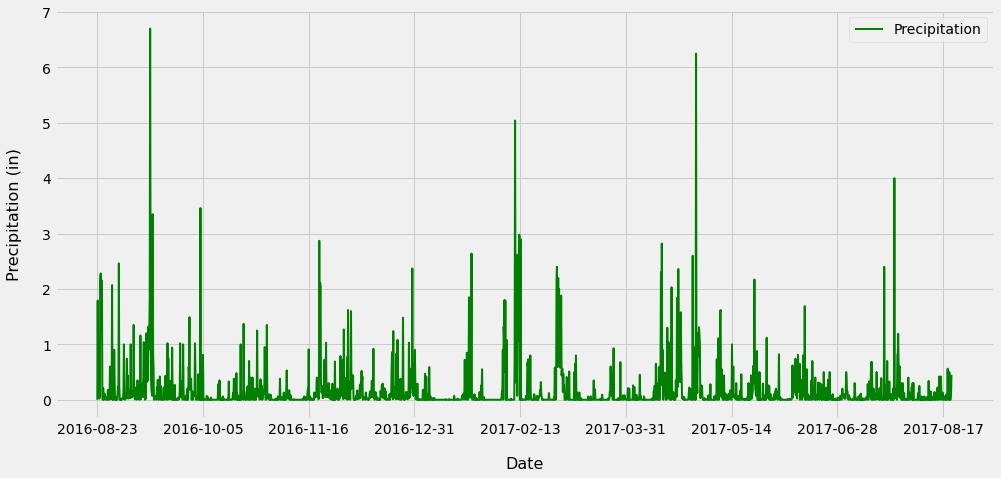

In [27]:
plt.rcParams['figure.figsize']=(15,7)
precipitation_score_df.plot(linewidth=2,alpha=1,rot=0, color='green')
plt.xlabel('Date',fontsize=16,color='black',labelpad=20)
plt.ylabel('Precipitation (in)',fontsize=16,color='black',labelpad=20)
plt.savefig("12 months prcp.png")
plt.show()

In [28]:
# Use Pandas to calcualte the summary statistics for the precipitation data


In [30]:
precipitation_score_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [31]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
print('Total stations in Honolulu, Hawaii :', total_stations) 

Total stations in Honolulu, Hawaii : 9


In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [33]:
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [35]:
station_number = 'USC00519281'
session.query(func.min(Measurement.tobs),
             func.max(Measurement.tobs),
             func.avg(Measurement.tobs)).filter(Measurement.station == station_number).all()

[(54.0, 85.0, 71.66378066378067)]

In [36]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [37]:
twelve_month_tobs=(session.query(Measurement.date,(Measurement.tobs))
                     .filter(func.strftime(Measurement.date)>lastyear_date)
                     .filter(Measurement.station == 'USC00519281').all())
twelve_month_tobs                     

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [38]:
twelve_month_tobs_df = pd.DataFrame(twelve_month_tobs)
twelve_month_tobs_df

,0,1
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


In [39]:
twelve_month_tobs_df=twelve_month_tobs_df.rename(columns={0:'date', 1:'Temperature'})

In [40]:
twelve_month_tobs_df.head(1)

,date,Temperature
0,2016-08-24,77.0


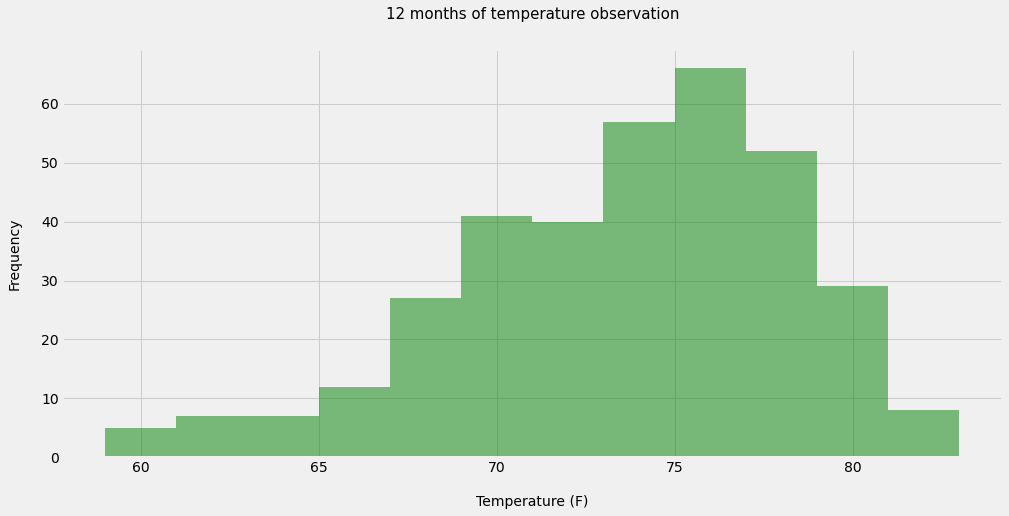

In [43]:

plt.rcParams['figure.figsize']=(15,7)
plt.hist(twelve_month_tobs_df['Temperature'], bins=12, alpha =0.5, color='green')
plt.title('12 months of temperature observation', fontsize = 15, pad = 30)
plt.xlabel('Temperature (F)',fontsize=14,color='black',labelpad=20)
plt.ylabel('Frequency',fontsize=14,color='black',labelpad=20)
plt.savefig("12 months of temperature observation.png")
plt.show()

# Close session

In [44]:
# Close Session
session.close()